In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('clean_movie.csv', index_col=0)
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


## Trung bình lợi nhận của các thể loại phim thông qua các trường dữ liệu `Genrce`, `Budget`, `Income`

Để thấy được lợi nhuận của các thể thoại phim mang lại, ta sẽ trực quan hoá các trường dữ liệu bao gồm `Genrce`, `Budget`, `Income` (với lợi nhuận bằng Imcome - Budget).

Vì có rất nhiều thể loại phim nên để trực quan hoá được rõ ràng nên ta sẽ chọn top 10 loại phim có số lượng phim nhiều nhất.

Đầu tiên, ta sẽ lấy các loại phim và số lượng phim của các thể loại. Sau đó chọn ra top 10 loại phim có số lượng cao nhất.

In [12]:
arr = np.concatenate(np.array(df["Genre"].str.split(', ')))
unique_values, value_counts = np.unique(arr, return_counts=True)
dic = {}
for value, count in zip(unique_values, value_counts):
    dic[value] = count
dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=True))
top_10_genre = list(dic.keys())[:10]

Tiếp đến, ta sẽ tạo DataFrame để lưu tổng Budget và Income của từng thể loại phim

In [13]:
dic_10_genre_budge_income_agr = pd.DataFrame([],columns=['Budget', 'Income'])
for i in top_10_genre:
    df_temp = df[df["Genre"].apply(lambda x: i in x.split(', '))]
    dic_10_genre_budge_income_agr.loc[i,'Budget'] = int(df_temp['Budget'].mean())
    dic_10_genre_budge_income_agr.loc[i,'Income'] = int(df_temp['Income'].mean())

Để thấy được lượng kinh phí trung bình (`Budget`) và doanh thu trung bình (`Income`) ta sẽ sử dụng biểu đồ bar để vẽ 2 trường dữ liệu trên. Đồng thời, ta sẽ dùng line chart để vẽ lợi thuận trung thu được của các thể loại phim (`Genrce`) phim.

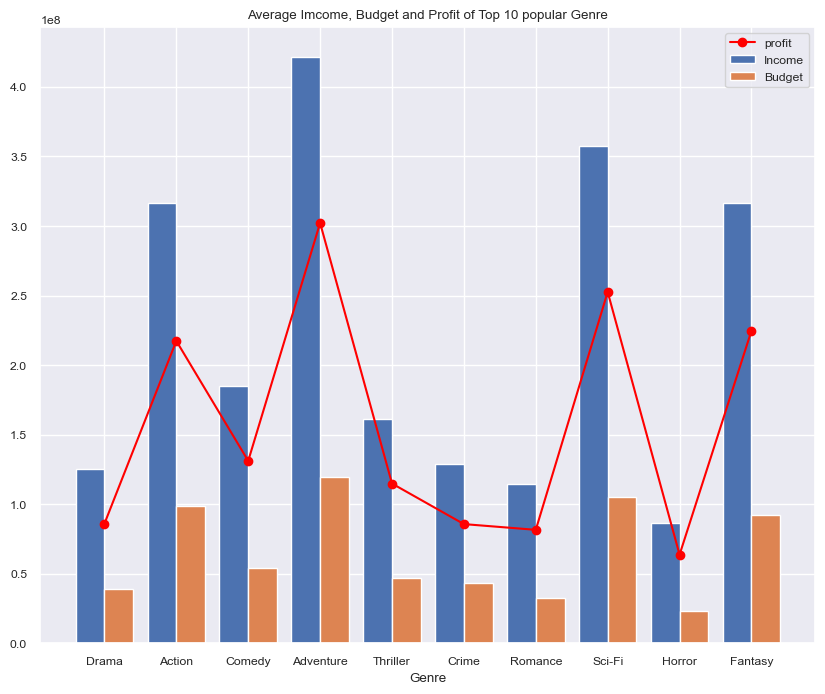

In [14]:
axis = np.arange(len(dic_10_genre_budge_income_agr.index))
plt.figure(figsize=(10,8)) 
plt.bar(axis - 0.2, dic_10_genre_budge_income_agr['Income'], 0.4, label = 'Income')
plt.bar(axis + 0.2, dic_10_genre_budge_income_agr['Budget'], 0.4, label = 'Budget')
plt.plot(axis ,dic_10_genre_budge_income_agr['Income'] - dic_10_genre_budge_income_agr['Budget'], marker='o', color='red', label='profit')
plt.xticks(axis, dic_10_genre_budge_income_agr.index)
plt.xlabel("Genre")
plt.title("Average Imcome, Budget and Profit of Top 10 popular Genre")
plt.legend()
plt.show()

Từ biểu đồ trên ta thấy được:

- Kinh phí (`Budget`) và doanh thu (`Imcome`) tỉ lệ thuận với nhau. Dẫn đến những loại phim có kinh phí cao thường có doanh thu lớn (điều này có thể do thể loại phim đó đầu tư nhiều hơn sẽ chất lương và hay hơn, hoặc cũng có thể các nhà làm phim thấy được lợi thuận lớn mà loại phim đó mang lại nên đầu tư nhiều hơn).
- Các loại phim có kinh phí cũng như doanh thu cao nhất là Adventure, Sci-Fi, Action, Fantasy. Những thể loại phim này đều là những phim rất phổ biến và được mọi người ưa chuộng. Đồng thời cũng là những loại phim tốn nhiều kinh phí để thực hiện nhất.

## Số lượng phim ra mắt mỗi tháng qua từng năm

Để thấy được thị trường phim như thế nào qua các tháng trong năm và qua từng năm ta sẽ trực quan hoá các trường dữ liệu bao gồm `Year`, `Month`.

Đầu tiên ta sẽ tạo dữ liệu là một DataFrame với index là 12 tháng trong năm và cột là số lượng phim các tháng qua các năm.

In [15]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month.reverse()
new_df = pd.DataFrame([], index = month)
year_min = df['Year'].min()
year_max = df['Year'].max()
for i in range(year_min, year_max+1):
    temp_list = []
    for j in month:
        temp_list.append(df[(df['Year'] == i) & (df['Month'] == j)].shape[0])
    new_df[i] = temp_list

Ta sẽ dùng heat map Để trực quan dữ liệu trên

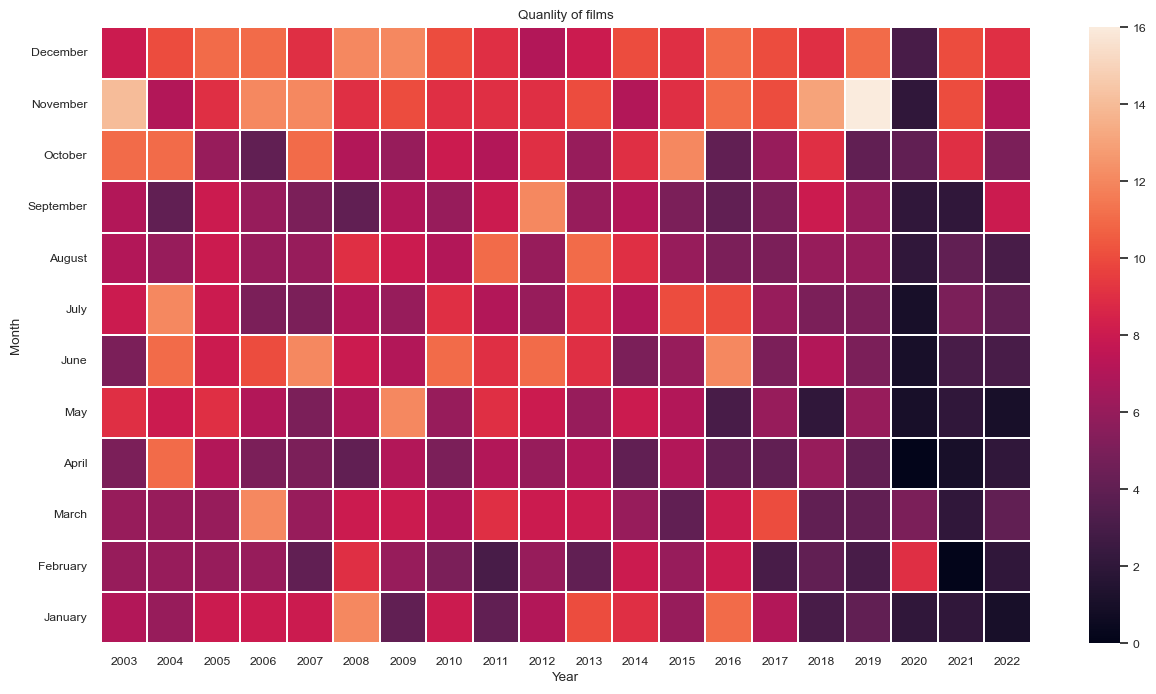

In [16]:
plt.figure(figsize=(15,8))
sns.set(font_scale = 0.8)
sns.heatmap(new_df,linewidth=.25).set(xlabel='Year', ylabel='Month', title="Quanlity of films")
plt.show()

Biểu đồ trên cho ta thấy được: 

- Lượng phim ra mắt trong năm có sự chêch lệch nhau về các tháng trong năm. Có vẻ từ tháng 6 đến tháng 12 thì phim được ra mắt nhiều hơn và những tháng đầu năm thì lượng phim ra mắt ít hơn. (Có lẽ là do những tháng đầu năm là những tháng cao điểm của việc làm phim)
- Lượng phim ra mắt ở các năm có vẻ không chêch lệch nhau quá nhiều.
- Đặc biệt là ở những năm gần đây (2020-2021-2022), lượng phim ra mắt bị giảm rất nhiều, có những tháng không có phim nào ra mắt. Nguyên nhân ở đây có lẽ là do dịch Covid-19 khiến cho nghành làm phim trên cả thế giới bị gián đoạn(không đi quay được và mọi người cũng không ra rạp coi được). Nhưng trong 3 năm đó vẫn có 1 vài tháng có lượng phim ra rạp khá ổn. Chắc có lẽ đây là những tháng dịch giảm ở một số quốc gia có nghành làm phim phát triển.